# <span style="color:green"> Laboratorio di simulazione numerica </span>
### Martina Colombo, 977556
## <span style="color:blue">  Esercitazione 2</span>


In [32]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from IPython.display import HTML

In [33]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

In [34]:
params = {'font.size':18, 'legend.fontsize': 'large' ,'axes.labelsize': 'x-large','axes.titlesize':'x-large','xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#### Introduzione teorica
In questa esercitazione trattiamo il problema della risoluzione di integrali tramite metodi Monte Carlo. Vogliamo risolvere un integrale del tipo $I = \int_a^b f(x) dx$, dividiamo a tal scopo l'intervallo $[a,b]$ in $N$ sottointervalli, l'integrale a questo punto si può ottenere tramite $$I = \lim_{x\to +\infty} \sum_{i=1}^N \frac{(b-a)}{N} \cdot  f(x_i) = (b-a)\lim_{x\to +\infty} \frac{1}{N} \sum_{i=1}^N f(x_i) = (b-a)\langle f\rangle_{[a,b]} .$$ Dunque $I$ può essere ricavato mediante la stima della media di $f$ ovvero $I \simeq (b-a) \frac{1}{N} \sum_{i=1}^N f(x_i)$ campionando le $x_i$ in modo casuale in $[a, b]$. In particolare se abbiamo un intergale $I = \int_\Omega f(x) p(x) dx$ dove $p(x)\ge 0 \,\,\, \forall x  \in \Omega$ e $\int_\Omega p(x) dx = 1$ campioniamo $N$ variabili $x_i$ da $p(x)$ e stimiamo l'integrale $I$ tramite la funzione $F_N(x) = \frac{1}{N} \sum_{i=1}^N f(x_i)$, poichè $F_N(x)$ è una stima dell'integrale gli possiamo associare un errore dato da $\epsilon = \frac {\sigma_I}{\sqrt N}$ dove $\sigma^2_I = \int_{\Omega} f^2(x) p(x) dx - I^2$. Un altro metodo per valutare l'integrale è quello dell'importance sampling, consideriamo nuovamente l'integrale  $I = \int_\Omega f(x) p(x) dx$, prendiamo una funzione $d(x)$ che meglio approssima l'integranda e riscriviamo l'integrale come $I = \int [\frac{f(x) p(x)}{d(x)}]d(x) dx$ dove $d(x)\ge 0 \,\,\, \forall x  \in \Omega$, $\int_\Omega d(x) dx = 1$ e $\frac{f(x) p(x)}{d(x)} < \infty$, la stima dell'integrale sarà data dalla funzione $F_N(x) = \frac{1}{N} \sum_{i=1}^N \frac {f(x_i)p(x_i)}{d(x_i)}$. La scelta di una funzione $d(x)$ che approssima l'integranda ha come conseguenza il fatto che la varianza si riduce, infatti di seguito confrontando il grafico di un integrale risolto con un sampling uniforme e con l'importance sampling vedremo che il secondo metodo è più accurato e mostra una varianza inferiore. 

### Esercizio 02.1
- Nel primo esercizio risolviamo tramite i metodi Monte Carlo descritti sopra il seguente integrale unidimensionale
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1.$$ Poniamo per comodità $f(x) = \frac{\pi}{2}\cos(\pi x/2)$.

1. Il primo metodo di integrazione che utilizziamo è quello del sampling di una distribuzione uniforme in $[0,1]$. Per prima cosa generiamo un numero casuale $r$ in $[0,1]$, valutiamo la funzione $f(x)$ in questo punto e ripetiamo questo procedimento per $M=10^4$ step Monte Carlo utilizzando il metodo del data blocking con $N=10^2$ numero di blocchi per stimare la media e l'incertezza di $F_N(x) = \frac{1}{N} \sum_{i=1}^N f(x_i)$.
2. Il secondo metodo che utilizziamo è l'importance sampling, scegliamo quindi la funzione $p(x)=2\cdot(1-x)$ che approssima linearmente l'integranda come si può vedere in figura.

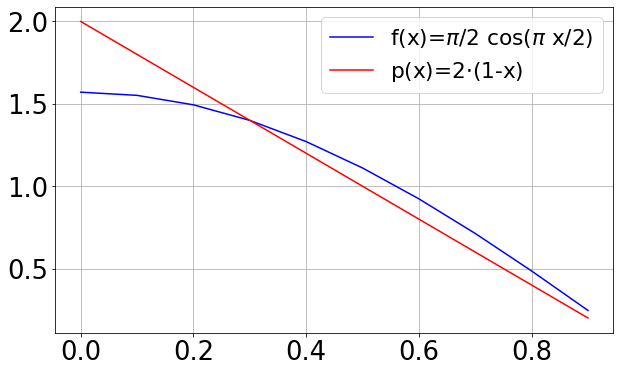

In [35]:
plt.figure(figsize=(10,6))
a=0
b=1
dt=0.1
t = np.arange(a,b,dt)
x=np.cos(np.pi*t/2)
plt.plot(t, np.pi/2*x, label='f(x)=$\pi$/2 cos($\pi$ x/2)', c='blue')
plt.plot(t, 2*(1-t), label='p(x)=2$\cdot$(1-x)', c='red')
plt.grid()
plt.legend(loc='best')


plt.show()

Utilizzando il metodo dell'inversione della cumulata generiamo $M$ variabili casuali $x_i$ distribuite secondo $p(x)$, valutiamo la funzione $F_N(x)=\frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)}$ nelle variabili random generate e otteniamo la media e la varianza per la stima dell'integrale tramite il metodo a blocchi. Nella figura seguente riportiamo i risultati della stima dell'integrale al variare del numero di blocchi, vediamo come nel caso del sampling uniforme la convergenza al valore atteso è molto lenta, mentre nel caso dell'importance sampling la convergenza è veloce ed il risultato ottenuto ha una precisione maggiore con un errore circa tre volte inferiore. 

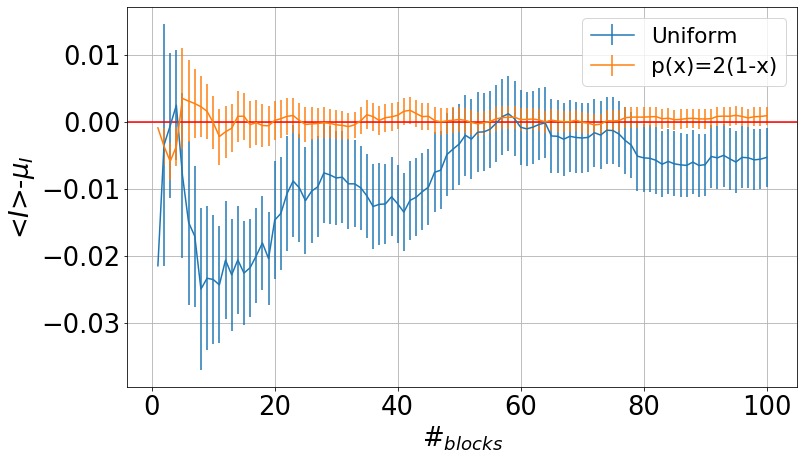

In [36]:
plt.figure(figsize=(12,7))

x, y, error, y_g, error_g = np.loadtxt("2.1/file.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')
plt.errorbar(x,y-1,yerr=error, label='Uniform')
plt.errorbar(x,y_g-1,yerr=error_g, label='p(x)=2(1-x)')
plt.grid()
plt.axhline(y=0, color='red')
plt.xlabel('$\#_{blocks}$')
plt.ylabel('<$I$>-$\mu_I$')
plt.legend(loc='best')


plt.show()

### Esercizio 02.2
- Nel secondo esercizio simuliamo un random walk tridimensionale che parte dall'origine prima in un reticolo cubico, poi nel continuo. Un random walk è un processo Markoviano, ovvero un processo tale per cui la probabilità di trovarsi in un certo punto ad un dato tempo dipende soltanto dalla probabilità al tempo precedente e non da tutto il percorso effettuato. Il entrambi i casi le probabilità di muoversi nelle direzioni possibili sono uguali, lo spazio è isotropo.

1. Nel primo caso analizziamo un RW su reticolo cubico con un passo reticolare $a=1$. Ad ogni step temporale del processo il walker fa un passo avanti o indietro in una delle tre direzioni possibili del reticolo $x, y$ o $z$. Operativamente il programma genera un numero casuale intero tra $[0,2]$, con il quale viene scelta ripettivamente la direzione $x, y$ o $z$ in cui verrà fatto il passo, si genera poi un altro numero casuale compreso tra $0$ e $1$ se il numero è minore di $0.5$ viene fatto un salto in avanti nella direzione scelta, altrimenti viene fatto un salto indietro. Teniamo memoria della posizione e ad ogni passo calcoliamo la quantità $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ che rappresenta la radice quadrata della distanza raggiunta dal walker rispetto all'origine al passo N-esimo. 
2. Nel caso di un RW nel continuo il walker ad ogni step temporale fa un passo di lunghezza $a=1$ in una direzione casuale ottenuta campionando l'angolo solido uniformemente. Campionare l'angolo solido significa generare numeri casuali per l'angolo $\theta \in [0,\pi]$ e per l'angolo $\phi \in [0,2\pi]$, successivamente le coordinate spaziali della nuova posizione del walker saranno date da 

$$ \begin{align*}  x &= a sen(\theta) cos(\phi) \\ y &= a sen(\theta) sen(\phi) \\ z &= a cos(\theta) \end{align*}  $$ con cui è possibile calcolare la quantità di interesse $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$.

Nella figura seguente mostriamo l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ nei due casi analizzati, generiamo $10^4$ random walk ognuno dei quali è lungo $\#_{steps}=10^2$ step. Notiamo che in entrambi i casi è possibile fittare l'andamento dei dati con la funzione $f(N)=k\sqrt{N}$ con $k=1$, questo denota il tipico andamento diffusivo del random walk con coefficiente di diffusione $D=1/2$.

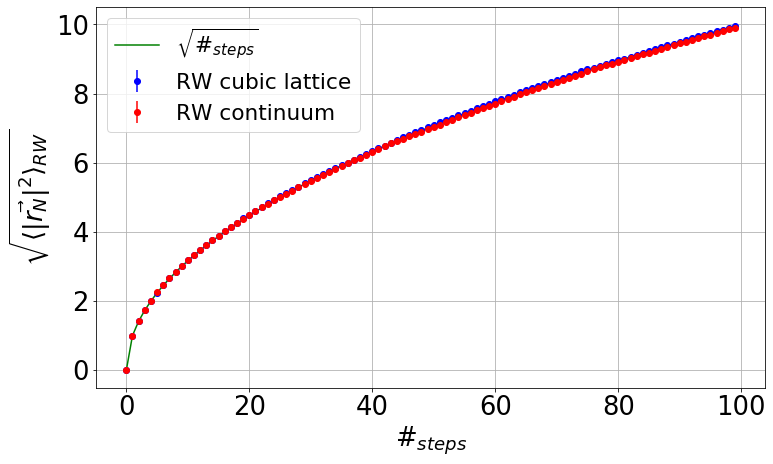

In [37]:
plt.figure(figsize=(12,7))

x, y, y_err= np.loadtxt("2.2/RW_lattice.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=y_err, label='RW cubic lattice', fmt='ob')

x_c, y_c, y_err_c= np.loadtxt("2.2/RW_continuum.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x_c, y_c, yerr=y_err_c, label='RW continuum', fmt='or')

xmin=np.min(x)
xmax=np.max(x)
data = np.linspace(xmin,xmax)

plt.plot(x, np.sqrt(x), color='green', label='$\sqrt{\#_{steps}}$')
plt.grid()
plt.xlabel('$\#_{steps}$')
plt.ylabel('$\sqrt{\langle|\\vec{r_N}|^2 \\rangle_{RW}}$')
plt.legend(loc='best')



plt.show()